# Displaying the provided data

In [ ]:
from IPython.display import display 
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
from numpy import*
from pylab import*

spitz = pd.read_csv("SPITZER_data.dat", delim_whitespace = True )

display(spitz)

,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
0,93.030693,0.001480,20.248060,0.001640,15.897,0.094,99.999,99.999,99.999,99.999,99.999,99.999
1,92.957161,0.000262,20.249760,0.000664,12.488,0.019,99.999,99.999,99.999,99.999,99.999,99.999
2,92.956596,0.000409,20.250851,0.000576,14.503,0.023,99.999,99.999,99.999,99.999,99.999,99.999
3,93.007553,0.001810,20.250330,0.002460,16.564,0.122,99.999,99.999,99.999,99.999,99.999,99.999
4,92.990768,0.002100,20.250450,0.002480,16.726,0.138,99.999,99.999,99.999,99.999,99.999,99.999
...,...,...,...,...,...,...,...,...,...,...,...,...
31246,92.478317,0.000578,20.519806,0.000580,99.999,99.999,99.999,99.999,99.999,99.999,8.163,0.021
31247,92.470184,0.000798,20.499067,0.000835,99.999,99.999,99.999,99.999,99.999,99.999,8.120,0.029
31248,92.473938,0.000930,20.499886,0.000946,99.999,99.999,99.999,99.999,99.999,99.999,8.576,0.033
31249,92.459580,0.000575,20.508356,0.000599,99.999,99.999,99.999,99.999,99.999,99.999,8.344,0.021


# Displaying all the data with photometric uncertainties (σ) < 0.2 mag detections in all four IRAC bands

,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
932,92.480694,0.000007,20.294273,0.000022,11.068,0.005,11.087,0.005,10.824,0.011,10.799,0.020
1397,92.483129,0.000043,20.319754,0.000006,10.514,0.004,9.992,0.004,9.845,0.007,9.804,0.011
2749,93.000643,0.000011,20.368433,0.000008,13.287,0.009,13.212,0.011,13.167,0.043,13.508,0.148
2750,92.997374,0.000028,20.368770,0.000035,14.035,0.013,13.878,0.016,13.868,0.075,13.704,0.177
2769,93.026750,0.000030,20.367217,0.000032,11.858,0.006,11.764,0.008,11.821,0.019,11.762,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...
28418,92.051629,0.000022,20.695656,0.000025,13.395,0.085,13.032,0.010,12.686,0.028,11.397,0.029
28419,92.194144,0.000015,20.717837,0.000035,13.031,0.073,13.058,0.007,12.782,0.040,12.043,0.045
28421,92.205721,0.000011,20.732680,0.000011,12.330,0.036,12.271,0.005,12.238,0.022,12.481,0.056
28422,92.297810,0.000014,20.767584,0.000016,7.538,0.005,7.677,0.006,10.827,0.078,7.426,0.005


Colour - Colour plots in different wavelength bands



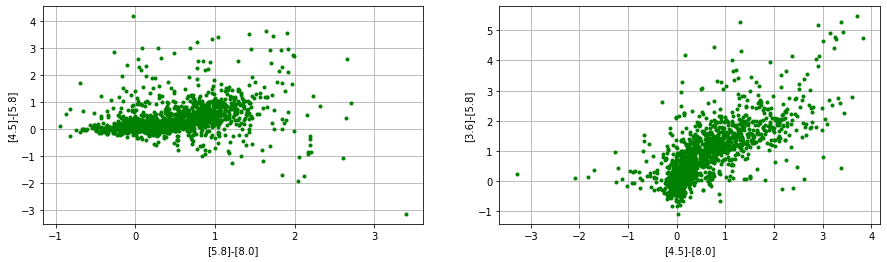

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

spitz = pd.read_csv("SPITZER_data.dat", delim_whitespace = True )

err_rem = spitz[(spitz.ch1_err < 0.2) & (spitz.ch2_err < 0.2) & (spitz.ch3_err < 0.2) & (spitz.ch4_err < 0.2)]

err_rem.to_csv('err_rem.csv')

display(err_rem)


#------------------------------------------------------------------------------------


ch36 = err_rem['ch1'].tolist()
ch45 = err_rem['ch2'].tolist()
ch58 = err_rem['ch3'].tolist()
ch80 = err_rem['ch4'].tolist()

a = []
b = []
c = []
d = []

n = len(err_rem)

for i in range(n):
    a.append(ch45[i] - ch58[i])
    b.append(ch58[i] - ch80[i])
    c.append(ch36[i] - ch58[i])
    d.append(ch45[i] - ch80[i])
    

fig,(ax1,ax2) = subplots(1,2,figsize = (15,4))


#------------------------------------------------------------------------------------


print('Colour - Colour plots in different wavelength bands\n')

ax1.set_xlabel('[5.8]-[8.0]')
ax1.set_ylabel('[4.5]-[5.8]')
ax1.plot(b,a,'g.')
ax1.grid()

ax2.set_xlabel('[4.5]-[8.0]')
ax2.set_ylabel('[3.6]-[5.8]')
ax2.plot(c,d,'g.')
ax2.grid()
show()


# Constraints for PAH galaxies

We have used the ([4.5] − [5.8]) versus ([5.8] − [8.0]) and the ([3.6] − [5.8]) versus ([4.5] − [8.0]) colour–colour plots to identify and remove the PAH galaxy contamination from the system.



PAH galaxies using the first condition
No. of PAH galaxies based on condition 1: 43


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
37,92.727729,0.000020,20.392807,0.000016,13.471,0.010,13.033,0.010,13.147,0.050,11.724,0.038
59,92.920917,0.000048,20.408320,0.000032,14.360,0.012,14.261,0.018,13.859,0.051,11.208,0.022
77,92.785859,0.000041,20.417604,0.000063,12.869,0.008,13.865,0.018,14.134,0.087,12.907,0.109
87,92.635264,0.000030,20.421692,0.000025,13.743,0.010,13.733,0.012,13.937,0.076,12.806,0.075
112,92.597417,0.000066,20.430614,0.000070,13.441,0.010,13.474,0.013,13.466,0.066,12.121,0.061
220,92.636748,0.000009,20.487247,0.000025,14.163,0.009,13.787,0.011,13.592,0.044,12.223,0.049
324,92.501163,0.000054,20.541753,0.000059,14.348,0.016,13.874,0.017,13.887,0.092,12.039,0.055
333,92.483870,0.000013,20.546320,0.000009,13.431,0.013,13.412,0.014,13.640,0.104,12.249,0.076
420,92.723237,0.000018,20.596068,0.000025,14.650,0.014,14.282,0.012,14.755,0.133,13.566,0.101
447,92.756172,0.000012,20.607495,0.000013,13.261,0.010,13.291,0.013,14.165,0.132,12.982,0.134




PAH galaxies using the second condition
No. of PAH galaxies based on condition 2: 64


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
58,92.778606,0.000035,20.420921,0.000046,13.716,0.011,16.254,0.158,13.625,0.074,13.299,0.152
59,92.920917,0.000048,20.408320,0.000032,14.360,0.012,14.261,0.018,13.859,0.051,11.208,0.022
112,92.597417,0.000066,20.430614,0.000070,13.441,0.010,13.474,0.013,13.466,0.066,12.121,0.061
117,92.900734,0.000041,20.459266,0.000066,12.753,0.008,14.846,0.078,11.618,0.016,10.841,0.019
123,92.570928,0.000059,20.437139,0.000027,12.932,0.006,14.795,0.042,12.892,0.032,12.641,0.087
...,...,...,...,...,...,...,...,...,...,...,...,...
1614,92.147483,0.000074,20.622987,0.000009,12.562,0.008,12.531,0.009,11.212,0.016,9.696,0.016
1621,92.136205,0.000021,20.622891,0.000066,12.653,0.008,12.703,0.010,11.880,0.027,10.421,0.050
1703,92.238240,0.000026,20.645806,0.000018,14.299,0.022,15.074,0.053,14.150,0.184,12.887,0.189
1790,92.342268,0.000044,20.699342,0.000010,12.048,0.006,11.806,0.006,11.592,0.018,9.877,0.074




Total number of PAH galaxies: 89



----------Plots----------



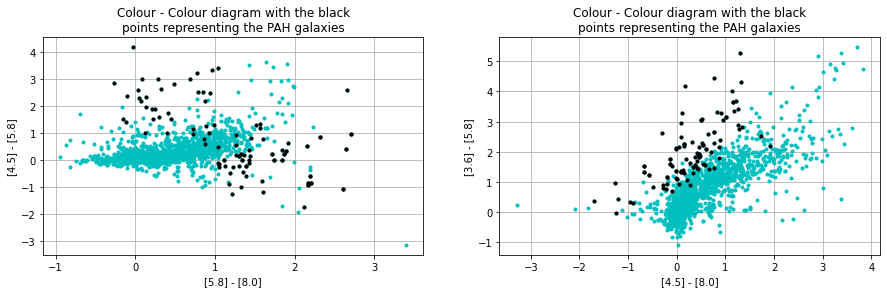

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

err_rem = pd.read_csv("err_rem.csv")
del err_rem["Unnamed: 0"]

pah1 = err_rem[((err_rem.ch2 - err_rem.ch3) < (1.05/1.2)*(err_rem.ch3 - err_rem.ch4 - 1)) & ((err_rem.ch2 - err_rem.ch3) < 1.05) & ((err_rem.ch3 - err_rem.ch4) > 1) & (err_rem.ch2 > 11.5)]
pah2 = err_rem[((err_rem.ch1-err_rem.ch3)<(1.5/2)*(err_rem.ch2-err_rem.ch4-1)) & ((err_rem.ch1-err_rem.ch3)<1.5) & ((err_rem.ch2-err_rem.ch4)>1) & (err_rem.ch2>11.5)]

all_pah = pd.concat([pah1,pah2])
all_pah.drop_duplicates(subset=None, keep='first', inplace=True)

pah1.to_csv('pah1.csv')
pah2.to_csv('pah2.csv')
all_pah.to_csv('all_pah.csv')


#------------------------------------------------------------------------------------


ch36 = err_rem['ch1'].tolist()
ch45 = err_rem['ch2'].tolist()
ch58 = err_rem['ch3'].tolist()
ch80 = err_rem['ch4'].tolist()

a = []
b = []
c = []
d = []

n = len(err_rem)

for i in range(n):
    a.append(ch45[i] - ch58[i])
    b.append(ch58[i] - ch80[i])
    c.append(ch36[i] - ch58[i])
    d.append(ch45[i] - ch80[i])

    
#------------------------------------------------------------------------------------
    
    
print('\n\nPAH galaxies using the first condition')
n1 = len(pah1)
print('No. of PAH galaxies based on condition 1:',n1)
display(pah1)


p1ch36 = pah1['ch1'].tolist()
p1ch45 = pah1['ch2'].tolist()
p1ch58 = pah1['ch3'].tolist()
p1ch80 = pah1['ch4'].tolist()

a1 = []
b1 = []
c1 = []
d1 = []


for i in range(n1):
    a1.append(p1ch45[i] - p1ch58[i])
    b1.append(p1ch58[i] - p1ch80[i])
    c1.append(p1ch36[i] - p1ch58[i])
    d1.append(p1ch45[i] - p1ch80[i])    
    
    
#------------------------------------------------------------------------------------


print('\n\nPAH galaxies using the second condition')
n2 = len(pah2)
print('No. of PAH galaxies based on condition 2:',n2)
display(pah2)

p2ch36 = pah2['ch1'].tolist()
p2ch45 = pah2['ch2'].tolist()
p2ch58 = pah2['ch3'].tolist()
p2ch80 = pah2['ch4'].tolist()

a2 = []
b2 = []
c2 = []
d2 = []


for i in range(n2):
    a2.append(p2ch45[i] - p2ch58[i])
    b2.append(p2ch58[i] - p2ch80[i])
    c2.append(p2ch36[i] - p2ch58[i])
    d2.append(p2ch45[i] - p2ch80[i])    

print('\n\nTotal number of PAH galaxies:',len(all_pah))
print('\n\n\n----------Plots----------\n')


#------------------------------------------------------------------------------------


fig,(ax1,ax2) = subplots(1,2,figsize = (15,4))


ax1.set_xlabel('[5.8] - [8.0]')
ax1.set_ylabel('[4.5] - [5.8]')
ax1.set_title("Colour - Colour diagram with the black\npoints representing the PAH galaxies")
ax1.plot(b,a,'c.')
ax1.plot(b1,a1,'k.')
ax1.plot(b2,a2,'k.')
ax1.grid()

ax2.set_xlabel('[4.5] - [8.0]')
ax2.set_ylabel('[3.6] - [5.8]')
ax2.set_title("Colour - Colour diagram with the black\npoints representing the PAH galaxies")
ax2.plot(c,d,'c.')
ax2.plot(c1,d1,'k.')
ax2.plot(c2,d2,'k.')
ax2.grid()
show()


# Constraints for for AGNs

We have used the [4.5]  versus ([4.5] − [8.0]) colour–magnitude plot to identify and remove the AGN contamination from the system.



No. of AGNs:  121

Table for the AGNs:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
10,92.984127,0.000033,20.370130,0.000005,16.461,0.053,15.594,0.048,13.956,0.077,12.526,0.063
44,92.912039,0.000021,20.395325,0.000039,16.033,0.039,15.377,0.040,14.408,0.108,12.961,0.088
58,92.778606,0.000035,20.420921,0.000046,13.716,0.011,16.254,0.158,13.625,0.074,13.299,0.152
60,92.942470,0.000036,20.411136,0.000017,14.192,0.010,14.115,0.013,14.312,0.073,13.549,0.135
62,92.848603,0.000014,20.411329,0.000024,14.366,0.012,13.938,0.017,13.255,0.035,12.281,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...
1780,92.066150,0.000011,20.690128,0.000020,14.753,0.013,14.277,0.019,13.807,0.050,13.589,0.173
1802,92.198187,0.000015,20.703827,0.000008,14.731,0.015,14.008,0.014,12.953,0.039,11.660,0.042
1921,92.055654,0.000017,20.768687,0.000005,14.352,0.012,14.249,0.019,13.998,0.065,13.686,0.161
1923,92.098124,0.000011,20.770168,0.000015,15.205,0.021,14.388,0.020,13.755,0.066,13.094,0.101




----------Plot----------




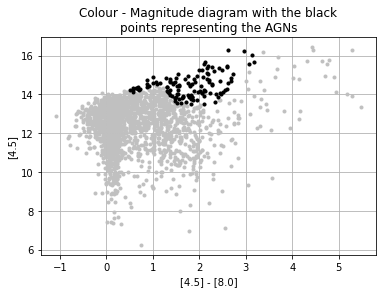

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

err_rem = pd.read_csv("err_rem.csv")
del err_rem["Unnamed: 0"]

agn1 = err_rem[((err_rem.ch2-err_rem.ch4)>0.5) & (err_rem.ch2>(13.5+(err_rem.ch2-err_rem.ch4-2.3)/0.4)) & (err_rem.ch2>13.5)]

agn = agn1[(err_rem.ch2>14+(err_rem.ch2-err_rem.ch4-0.5)) | (err_rem.ch2>(14.5-((err_rem.ch2-err_rem.ch4-1.2)/0.3))) | (err_rem.ch2>14.5)]

agn.to_csv('agn.csv')


n1 = len(agn)

print('\n\nNo. of AGNs: ',n1)
print('\nTable for the AGNs:')

display(agn)


#------------------------------------------------------------------------------------


ch36 = err_rem['ch1'].tolist()
ch45 = err_rem['ch2'].tolist()
ch58 = err_rem['ch3'].tolist()
ch80 = err_rem['ch4'].tolist()

a = []

n = len(err_rem)

for i in range(n):
    a.append(ch45[i] - ch80[i])


#------------------------------------------------------------------------------------

    
a1ch36 = agn['ch1'].tolist()
a1ch45 = agn['ch2'].tolist()
a1ch58 = agn['ch3'].tolist()
a1ch80 = agn['ch4'].tolist()

a1 = []


for i in range(n1):
    a1.append(a1ch45[i] - a1ch80[i])    


#------------------------------------------------------------------------------------


print("\n\n----------Plot----------\n\n")

xlabel('[4.5] - [8.0]')
ylabel('[4.5]')
title("Colour - Magnitude diagram with the black\npoints representing the AGNs")
plot(a,ch45,color = 'silver', marker = ".", linestyle='None')
plot(a1,a1ch45,'k.')
grid()
show()



# Constraints for Shock Emissions

We have used the ([3.6] - [4.5]) vs ([4.5] - [5.8]) colour–colour plot to identify and remove the Shock Emission contamination from the system.



No. of Shock Emissions: 30

Table for Shock Emissions:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
31,93.000233,0.000027,20.391227,0.000006,15.225,0.052,13.341,0.012,13.207,0.048,12.719,0.082
51,92.540583,0.000031,20.440674,0.000037,15.948,0.127,12.860,0.011,12.574,0.032,12.417,0.073
101,92.729798,0.000076,20.430443,0.000076,14.458,0.037,12.427,0.008,12.301,0.029,12.670,0.102
125,92.522719,0.000114,20.442558,0.000080,14.802,0.029,13.484,0.014,13.354,0.061,12.714,0.100
188,92.557265,0.000043,20.461525,0.000040,15.091,0.034,13.511,0.012,13.172,0.047,12.285,0.056
321,92.705410,0.000017,20.538465,0.000017,14.577,0.018,13.324,0.012,13.081,0.051,13.193,0.158
336,92.505519,0.000016,20.569411,0.000049,14.915,0.044,13.153,0.011,13.106,0.048,13.118,0.125
367,92.740111,0.000091,20.571315,0.000056,14.517,0.029,13.134,0.011,13.014,0.044,13.014,0.115
459,92.670628,0.000038,20.663228,0.000029,14.593,0.059,12.613,0.007,12.125,0.021,12.130,0.046
468,92.533017,0.000022,20.622050,0.000029,13.936,0.016,12.586,0.008,12.776,0.035,12.042,0.045




----------Plot----------




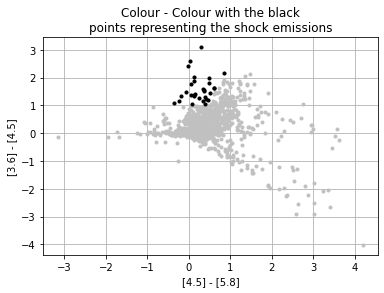

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

err_rem = pd.read_csv("err_rem.csv")
del err_rem["Unnamed: 0"]

sho = err_rem[((err_rem.ch1-err_rem.ch2)>(((1.2/0.55)*((err_rem.ch2-err_rem.ch3)-0.3))+0.8)) & ((err_rem.ch2-err_rem.ch3)<=0.85) & ((err_rem.ch1-err_rem.ch2)>1.05)]

sho.to_csv('sho.csv')

n1 = len(sho)

print('\n\nNo. of Shock Emissions:',n1)
print('\nTable for Shock Emissions:')

display(sho)


#------------------------------------------------------------------------------------


ch36 = err_rem['ch1'].tolist()
ch45 = err_rem['ch2'].tolist()
ch58 = err_rem['ch3'].tolist()
ch80 = err_rem['ch4'].tolist()

a = []
b = []

n = len(err_rem)

for i in range(n):
    a.append(ch36[i] - ch45[i])    
    b.append(ch45[i] - ch58[i])   


#------------------------------------------------------------------------------------

    
s1ch36 = sho['ch1'].tolist()
s1ch45 = sho['ch2'].tolist()
s1ch58 = sho['ch3'].tolist()
s1ch80 = sho['ch4'].tolist()

a1 = []
b1 = []



for i in range(n1):
    a1.append(s1ch36[i] - s1ch45[i])    
    b1.append(s1ch45[i] - s1ch58[i])    


#------------------------------------------------------------------------------------


print("\n\n----------Plot----------\n\n")

xlabel('[4.5] - [5.8]')
ylabel('[3.6] - [4.5]')
title("Colour - Colour with the black\npoints representing the shock emissions")
plot(b,a,color = 'silver', marker = ".", linestyle='None')
plot(b1,a1,'k.')
grid()
show()



# Constraints for PAH-contaminated apertures

We have used the ([3.6] - [4.5]) vs ([4.5] - [5.8]) colour–colour plot to identify and remove the PAH-contaminated apertures from the system.


No. of PAH-contaminated apertures: 213

Table for PAH-contaminated apertures:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
5,92.611600,0.000035,20.375628,0.000071,11.192,0.005,11.496,0.007,11.124,0.013,10.950,0.040
10,92.984127,0.000033,20.370130,0.000005,16.461,0.053,15.594,0.048,13.956,0.077,12.526,0.063
26,92.715748,0.000083,20.390785,0.000058,13.059,0.007,13.498,0.011,12.797,0.025,12.832,0.074
44,92.912039,0.000021,20.395325,0.000039,16.033,0.039,15.377,0.040,14.408,0.108,12.961,0.088
53,93.016329,0.000087,20.406155,0.000034,9.839,0.002,10.996,0.008,9.596,0.004,9.598,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...
1833,92.199277,0.000004,20.724209,0.000009,11.512,0.004,11.903,0.004,11.515,0.012,11.629,0.036
1847,92.063954,0.000051,20.730721,0.000110,9.385,0.003,10.823,0.004,9.274,0.005,9.183,0.008
1910,92.299802,0.000065,20.764688,0.000034,11.377,0.005,11.652,0.007,11.316,0.012,11.361,0.028
1931,92.313460,0.000027,20.775979,0.000051,15.497,0.029,15.302,0.037,14.344,0.109,11.636,0.033




----------Plot----------




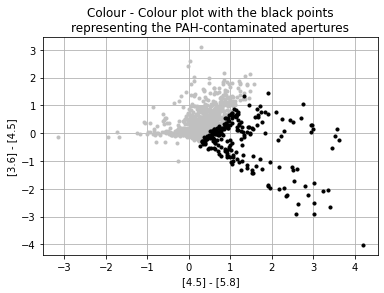

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

err_rem = pd.read_csv("err_rem.csv")
del err_rem["Unnamed: 0"]


ch36 = err_rem['ch1'].tolist()
ch45 = err_rem['ch2'].tolist()
ch58 = err_rem['ch3'].tolist()
ch80 = err_rem['ch4'].tolist()
ch36_err = err_rem['ch1_err'].tolist()
ch45_err = err_rem['ch2_err'].tolist()
ch58_err = err_rem['ch3_err'].tolist()
ch80_err = err_rem['ch4_err'].tolist()

sigma1 = []
sigma2 = []

err_rem1 = err_rem.copy()

for i in range(len(err_rem)):
    sigma1.append(sqrt((ch45_err[i])**2 + (ch58_err[i])**2))
    sigma2.append(sqrt((ch36_err[i])**2 + (ch45_err[i])**2))
    

err_rem1['sigma1'] = sigma1
err_rem1['sigma2'] = sigma2

pah_aper = err_rem1[((err_rem1.ch1 - err_rem1.ch2 - err_rem1.sigma2)<=1.4*(((err_rem1.ch2 - err_rem1.ch3)+ err_rem1.sigma1 - 0.7) + 0.15)) & ((err_rem1.ch1 - err_rem1.ch2 - err_rem1.sigma2)<=1.65)]

del pah_aper['sigma1']
del pah_aper['sigma2']

pah_aper.to_csv('pah_aper.csv')

n1 = len(pah_aper)

print('\nNo. of PAH-contaminated apertures:',n1)
print('\nTable for PAH-contaminated apertures:')

display(pah_aper)


#------------------------------------------------------------------------------------


a = []
b = []

n = len(err_rem)

for i in range(n):
    a.append(ch36[i] - ch45[i])    
    b.append(ch45[i] - ch58[i])   


#------------------------------------------------------------------------------------

    
pa1ch36 = pah_aper['ch1'].tolist()
pa1ch45 = pah_aper['ch2'].tolist()
pa1ch58 = pah_aper['ch3'].tolist()
pa1ch80 = pah_aper['ch4'].tolist()

a1 = []
b1 = []

n1 = len(pah_aper)


for i in range(n1):
    a1.append(pa1ch36[i] - pa1ch45[i])    
    b1.append(pa1ch45[i] - pa1ch58[i])    


#------------------------------------------------------------------------------------


print("\n\n----------Plot----------\n\n")

xlabel('[4.5] - [5.8]')
ylabel('[3.6] - [4.5]')
title("Colour - Colour plot with the black points\nrepresenting the PAH-contaminated apertures")
plot(b,a,color = 'silver', marker = ".", linestyle='None')
plot(b1,a1,'k.')
grid()
show()


# Separating out the non-contaminated data.

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

all_pah = pd.read_csv("all_pah.csv")
agn = pd.read_csv("agn.csv")
sho = pd.read_csv("sho.csv")
pah_aper = pd.read_csv("pah_aper.csv")
err_rem = pd.read_csv("err_rem.csv")

del err_rem["Unnamed: 0"]
del all_pah["Unnamed: 0"]
del agn["Unnamed: 0"]
del sho["Unnamed: 0"]
del pah_aper["Unnamed: 0"]

all_contam = pd.concat([all_pah,agn,sho,pah_aper])

all_contam.drop_duplicates(subset=None, keep='first', inplace=True)

print('\n\nThe total number of contaminants is:',len(all_contam))
print('Table:')

display(all_contam)


all_contam.to_csv('all_contam.csv')


#------------------------------------------------------------------------------------


common = err_rem.merge(all_contam, on=["RA","DEC"])
no_contam = err_rem[(~err_rem.RA.isin(common.RA)) & (~err_rem.DEC.isin(common.DEC))]

print('\n\nThe total number of non-contaminated sources is:',len(no_contam))
print('Table:')

display(no_contam)


no_contam.to_csv('no_contam.csv')







The total number of contaminants is: 424
Table:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err,Unnamed: 0.1
0,92.727729,0.000020,20.392807,0.000016,13.471,0.010,13.033,0.010,13.147,0.050,11.724,0.038,NaN
1,92.920917,0.000048,20.408320,0.000032,14.360,0.012,14.261,0.018,13.859,0.051,11.208,0.022,NaN
2,92.785859,0.000041,20.417604,0.000063,12.869,0.008,13.865,0.018,14.134,0.087,12.907,0.109,NaN
3,92.635264,0.000030,20.421692,0.000025,13.743,0.010,13.733,0.012,13.937,0.076,12.806,0.075,NaN
4,92.597417,0.000066,20.430614,0.000070,13.441,0.010,13.474,0.013,13.466,0.066,12.121,0.061,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,92.199277,0.000004,20.724209,0.000009,11.512,0.004,11.903,0.004,11.515,0.012,11.629,0.036,27001.0
209,92.063954,0.000051,20.730721,0.000110,9.385,0.003,10.823,0.004,9.274,0.005,9.183,0.008,27049.0
210,92.299802,0.000065,20.764688,0.000034,11.377,0.005,11.652,0.007,11.316,0.012,11.361,0.028,27320.0
211,92.313460,0.000027,20.775979,0.000051,15.497,0.029,15.302,0.037,14.344,0.109,11.636,0.033,27414.0




The total number of non-contaminated sources is: 1643
Table:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
0,92.480694,0.000007,20.294273,0.000022,11.068,0.005,11.087,0.005,10.824,0.011,10.799,0.020
1,92.483129,0.000043,20.319754,0.000006,10.514,0.004,9.992,0.004,9.845,0.007,9.804,0.011
2,93.000643,0.000011,20.368433,0.000008,13.287,0.009,13.212,0.011,13.167,0.043,13.508,0.148
3,92.997374,0.000028,20.368770,0.000035,14.035,0.013,13.878,0.016,13.868,0.075,13.704,0.177
4,93.026750,0.000030,20.367217,0.000032,11.858,0.006,11.764,0.008,11.821,0.019,11.762,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...
1980,92.051629,0.000022,20.695656,0.000025,13.395,0.085,13.032,0.010,12.686,0.028,11.397,0.029
1981,92.194144,0.000015,20.717837,0.000035,13.031,0.073,13.058,0.007,12.782,0.040,12.043,0.045
1982,92.205721,0.000011,20.732680,0.000011,12.330,0.036,12.271,0.005,12.238,0.022,12.481,0.056
1983,92.297810,0.000014,20.767584,0.000016,7.538,0.005,7.677,0.006,10.827,0.078,7.426,0.005


# Finding out the number of Class I YSOs and plotting them on a ([3.6] - [4.5]) vs ([4.5] - [5.8]) colour–colour plot



No. of Class I YSOs:  80
Table:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
146,92.729192,0.000019,20.484199,0.000040,12.694,0.005,11.887,0.007,10.899,0.007,10.178,0.016
152,92.905256,0.000013,20.468579,0.000018,15.283,0.022,13.356,0.012,12.502,0.029,11.408,0.028
167,92.722502,0.000034,20.503767,0.000027,11.869,0.004,10.739,0.004,9.879,0.005,8.964,0.006
173,92.537924,0.000016,20.489556,0.000011,15.011,0.018,13.487,0.013,12.559,0.024,11.805,0.047
212,92.914835,0.000022,20.519807,0.000026,12.680,0.007,11.901,0.005,11.114,0.013,10.624,0.014
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,92.123367,0.000013,20.702227,0.000013,11.945,0.004,10.918,0.003,10.120,0.005,9.266,0.007
1618,92.130356,0.000016,20.447163,0.000009,12.510,0.053,11.420,0.006,10.623,0.010,9.723,0.011
1623,92.464273,0.000023,20.476278,0.000007,11.298,0.022,10.295,0.004,9.487,0.037,8.443,0.006
1627,92.146818,0.000025,20.584849,0.000011,10.139,0.012,9.195,0.010,8.426,0.005,7.801,0.013




----------Plot----------




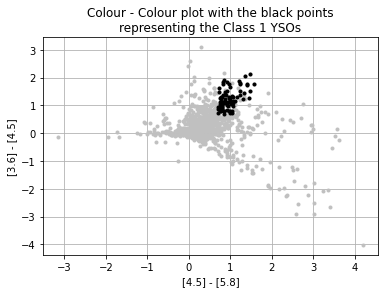

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

no_contam = pd.read_csv("no_contam.csv")
err_rem = pd.read_csv("err_rem.csv")

del err_rem["Unnamed: 0"]
del no_contam["Unnamed: 0"]


cls1_yso = no_contam[((no_contam.ch2 - no_contam.ch3) > 0.7) & ((no_contam.ch1 - no_contam.ch2) > 0.7)]


n1 = len(cls1_yso)

print('\n\nNo. of Class I YSOs: ',n1)
print('Table:')

display(cls1_yso)

cls1_yso.to_csv('cls1_yso.csv')


#------------------------------------------------------------------------------------------------------------------------


a = []
b = []

n = len(err_rem)

for i in range(n):
    a.append(ch36[i] - ch45[i])    
    b.append(ch45[i] - ch58[i])   


#------------------------------------------------------------------------------------

    
y1ch36 = cls1_yso['ch1'].tolist()
y1ch45 = cls1_yso['ch2'].tolist()
y1ch58 = cls1_yso['ch3'].tolist()
y1ch80 = cls1_yso['ch4'].tolist()

a1 = []
b1 = []


for i in range(n1):
    a1.append(y1ch36[i] - y1ch45[i])    
    b1.append(y1ch45[i] - y1ch58[i]) 


#------------------------------------------------------------------------------------

    
print("\n\n----------Plot----------\n\n")

xlabel('[4.5] - [5.8]')
ylabel('[3.6] - [4.5]')
title("Colour - Colour plot with the black points\nrepresenting the Class 1 YSOs")
plot(b,a,color = 'silver', marker = ".", linestyle='None')
plot(b1,a1,'k.')
grid()
show()



# Finding out the number of Class II YSOs and plotting them on a ([3.6] - [5.8]) vs ([4.5] - [8.0]) colour–colour plot



No. of Class II YSOs:  293
Table:


,RA,RA_err,DEC,DEC_err,ch1,ch1_err,ch2,ch2_err,ch3,ch3_err,ch4,ch4_err
31,92.765284,0.000019,20.391910,0.000014,13.772,0.011,13.333,0.012,13.031,0.040,12.363,0.059
33,92.774859,0.000018,20.393676,0.000012,12.260,0.006,11.973,0.007,11.795,0.018,10.837,0.019
40,92.951416,0.000009,20.399956,0.000021,13.049,0.005,12.586,0.006,12.185,0.015,11.307,0.021
55,92.680519,0.000029,20.429571,0.000020,13.241,0.010,12.860,0.010,12.468,0.035,11.686,0.051
59,92.871790,0.000008,20.418547,0.000019,12.029,0.004,11.428,0.004,10.801,0.007,10.181,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...
1628,92.147217,0.000047,20.586235,0.000083,12.002,0.035,11.120,0.029,10.712,0.021,9.874,0.034
1630,92.147298,0.000013,20.601146,0.000013,7.529,0.005,6.982,0.004,6.180,0.006,5.197,0.004
1635,92.122069,0.000027,20.638047,0.000009,11.914,0.024,11.079,0.019,10.422,0.012,9.517,0.015
1638,92.051629,0.000022,20.695656,0.000025,13.395,0.085,13.032,0.010,12.686,0.028,11.397,0.029




----------Plot----------




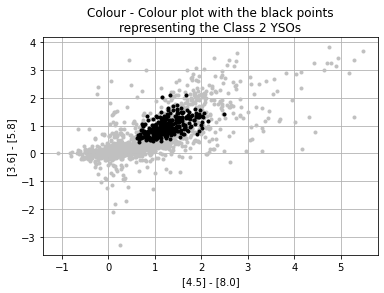

In [ ]:
import pandas as pd
from numpy import*
from pylab import*

no_contam = pd.read_csv("no_contam.csv")
err_rem = pd.read_csv("err_rem.csv")

del err_rem["Unnamed: 0"]
del no_contam["Unnamed: 0"]



common = no_contam.merge(cls1_yso, on=["RA","DEC"])
no_cls1 = no_contam[(~no_contam.RA.isin(common.RA)) & (~no_contam.DEC.isin(common.DEC))]


#------------------------------------------------------------------------------------


c1ch36 = no_cls1['ch1'].tolist()
c1ch45 = no_cls1['ch2'].tolist()
c1ch58 = no_cls1['ch3'].tolist()
c1ch80 = no_cls1['ch4'].tolist()
c1ch36_err = no_cls1['ch1_err'].tolist()
c1ch45_err = no_cls1['ch2_err'].tolist()
c1ch58_err = no_cls1['ch3_err'].tolist()
c1ch80_err = no_cls1['ch4_err'].tolist()

sigma3 = []
sigma4 = []


for i in range(len(no_cls1)):
    sigma3.append(sqrt((c1ch45_err[i])**2 + (c1ch80_err[i])**2))
    sigma4.append(sqrt((c1ch36_err[i])**2 + (c1ch58_err[i])**2))
    
no_cls1['sigma3'] = sigma3
no_cls1['sigma4'] = sigma4


#------------------------------------------------------------------------------------


cls2_yso = no_cls1[((no_cls1.ch2 - no_cls1.ch4 - no_cls1.sigma3) > 0.5) & ((no_cls1.ch1 - no_cls1.ch3 - no_cls1.sigma4) > 0.35) & ((no_cls1.ch1 - no_cls1.ch3 + no_cls1.sigma4)<=((0.14/0.04)*((no_cls1.ch2-no_cls1.ch4-no_cls1.sigma3)-0.5)+0.5)) & ((no_cls1.ch1 - no_cls1.ch2 - no_cls1.sigma4) > 0.15)]

del no_cls1['sigma3']
del no_cls1['sigma4']
del cls2_yso['sigma3']
del cls2_yso['sigma4']


n1 = len(cls2_yso)
print('\n\nNo. of Class II YSOs: ',n1)
print('Table:')

display(cls2_yso)


cls2_yso.to_csv('cls2_yso.csv')


#------------------------------------------------------------------------------------------------------------------------


a = []
b = []

n = len(err_rem)

for i in range(n):
    a.append(ch36[i] - ch58[i])    
    b.append(ch45[i] - ch80[i])   


#------------------------------------------------------------------------------------

    
y2ch36 = cls2_yso['ch1'].tolist()
y2ch45 = cls2_yso['ch2'].tolist()
y2ch58 = cls2_yso['ch3'].tolist()
y2ch80 = cls2_yso['ch4'].tolist()

a1 = []
b1 = []


for i in range(n1):
    a1.append(y2ch36[i] - y2ch58[i])    
    b1.append(y2ch45[i] - y2ch80[i]) 


#------------------------------------------------------------------------------------

    
print("\n\n----------Plot----------\n\n")

xlabel('[4.5] - [8.0]')
ylabel('[3.6] - [5.8]')
title("Colour - Colour plot with the black points\nrepresenting the Class 2 YSOs")
plot(b,a,color = 'silver', marker = ".", linestyle='None')
plot(b1,a1,'k.')
grid()
show()


# Creating Region files for Class I and Class II YSOs in Phase 1 analysis

In [ ]:
import pandas as pd

f = open("p1cls1reg.reg","w")
g = open("p1cls2reg.reg","w")

p1cls1 = pd.read_csv("cls1_yso.csv")
p1cls2 = pd.read_csv("cls2_yso.csv")

ra1 = p1cls1["RA"].tolist()
dec1 = p1cls1["DEC"].tolist()


ra2 = p1cls2["RA"].tolist()
dec2 = p1cls2["DEC"].tolist()


f.write("global color=red width=2 fixed=0 select=1 edit=1 move=0 delete=1 highlite=1 include=1 source=1\n")

g.write("global color=green width=2 fixed=0 select=1 edit=1 move=0 delete=1 highlite=1 include=1 source=1\n")


for i in range(len(p1cls1)):
    str1 = str(ra1[i])
    str2 = str(dec1[i])
    fin = "fk5; point("+str1+","+str2+") #point=circle\n"
    f.write(fin)

    
for j in range(len(p1cls2)):
    str11 = str(ra2[j])
    str22 = str(dec2[j])
    fin1 = "fk5; point("+str11+","+str22+") #point=circle\n"
    g.write(fin1)
    
    
f.close()
g.close()

print("Region files for class I and class II YSOs for phase 1 created")

Region files for class I and class II YSOs for phase 1 created
